In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

## Preparing a dataset for modeling
This data is from the Human Freedom Index. My target variable is **Organized Conflicts (pf_ss_disappearance) ** The following variables will act as the basis of features -  one categorical variable, **Region**; and four quantatative variables,  **Rule of law, Women's Security, Freedom to establish and operate religions, and Press Jailed**.


In [48]:
df = pd.read_csv('Human_Freedom_Index.csv')
df.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [49]:
df.columns


Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [50]:
df.region.value_counts()

Sub-Saharan Africa               378
Latin America & the Caribbean    234
Eastern Europe                   198
Middle East & North Africa       171
Western Europe                   162
South Asia                       153
East Asia                         54
Caucasus & Central Asia           54
Oceania                           36
North America                     18
Name: region, dtype: int64

In [51]:
df.isnull().sum()


year                                    0
ISO_code                                0
countries                               0
region                                  0
pf_rol_procedural                     578
pf_rol_civil                          578
pf_rol_criminal                       578
pf_rol                                 80
pf_ss_homicide                         80
pf_ss_disappearances_disap             89
pf_ss_disappearances_violent           80
pf_ss_disappearances_organized        179
pf_ss_disappearances_fatalities        80
pf_ss_disappearances_injuries          80
pf_ss_disappearances                   80
pf_ss_women_fgm                       172
pf_ss_women_missing                   120
pf_ss_women_inheritance_widows        541
pf_ss_women_inheritance_daughters     541
pf_ss_women_inheritance               119
pf_ss_women                           100
pf_ss                                  80
pf_movement_domestic                   98
pf_movement_foreign               

**I created a histogram of the target variable - organized conflict**


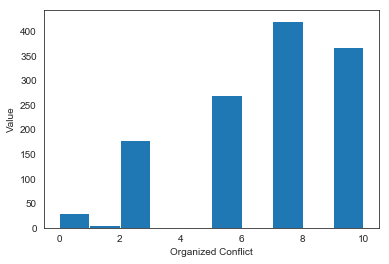

In [52]:
plt.hist(df['pf_ss_disappearances_organized'].dropna())
plt.xlabel('Organized Conflict')
plt.ylabel('Value')
plt.show()

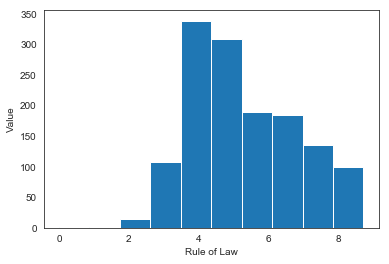

In [53]:
plt.hist(df['pf_rol'].dropna())
plt.xlabel('Rule of Law')
plt.ylabel('Value')
plt.show()

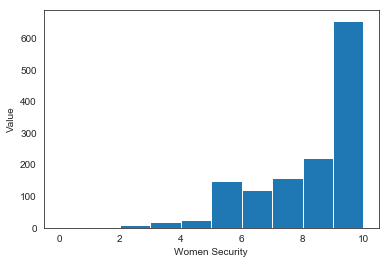

In [54]:
plt.hist(df['pf_ss_women'].dropna())
plt.xlabel('Women Security')
plt.ylabel('Value')
plt.show()

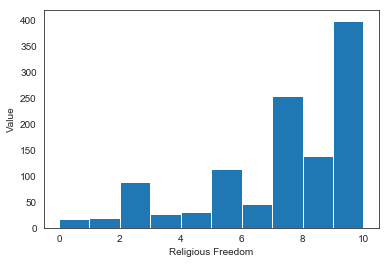

In [55]:
plt.hist(df['pf_religion_estop'].dropna())
plt.xlabel('Religious Freedom')
plt.ylabel('Value')
plt.show()

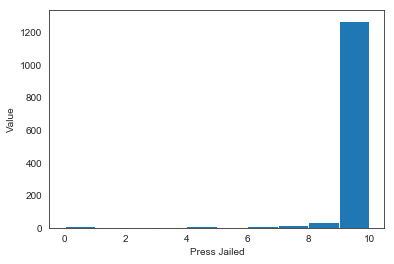

In [56]:
plt.hist(df['pf_expression_jailed'].dropna())
plt.xlabel('Press Jailed')
plt.ylabel('Value')
plt.show()

In [57]:
keep_regions = ['North America','Western Europe','Sub-Saharan Africa','Latin America & the Caribbean', 'Eastern Europe']

In [58]:
df_free2 = df[df.region.isin(keep_regions)]

In [59]:
df_free2 = df_free2[['region','pf_rol', 'pf_ss_women', 'pf_religion_estop', 'pf_expression_jailed', 'pf_ss_disappearances_organized']]

In [60]:
df_free2.columns

Index(['region', 'pf_rol', 'pf_ss_women', 'pf_religion_estop',
       'pf_expression_jailed', 'pf_ss_disappearances_organized'],
      dtype='object')

In [61]:
df_free2.region.value_counts()

Sub-Saharan Africa               378
Latin America & the Caribbean    234
Eastern Europe                   198
Western Europe                   162
North America                     18
Name: region, dtype: int64

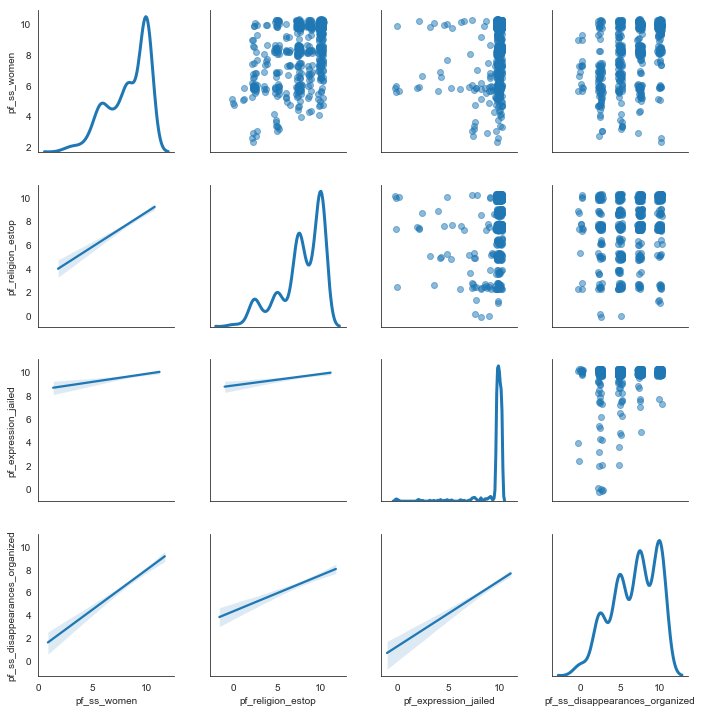

In [62]:
sns.set_style("white")

df_free = df.loc[
    ((df['region'] == 'North America') | (df['region'] == 'Western Europe') | (df['region'] == "Sub-Saharan Africa") | (df['region'] == 'Latin America & the Caribbean') | (df['region'] == 'Eastern Europe') | (df['region'] == 'Middle East & North Africa')),
    ['pf_rol', 'pf_ss_women', 'pf_religion_estop', 'pf_expression_jailed', 'pf_ss_disappearances_organized']]

df_jittered = df_free.loc[:, 'pf_ss_women':'pf_ss_disappearances_organized'].dropna()

jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

df_jittered = df_jittered.add(jitter)
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [63]:
corrmat = df_free.corr()
print(corrmat)

                                  pf_rol  pf_ss_women  pf_religion_estop  \
pf_rol                          1.000000     0.466029           0.330332   
pf_ss_women                     0.466029     1.000000           0.490390   
pf_religion_estop               0.330332     0.490390           1.000000   
pf_expression_jailed            0.093200     0.213228           0.159372   
pf_ss_disappearances_organized  0.666095     0.426281           0.270303   

                                pf_expression_jailed  \
pf_rol                                      0.093200   
pf_ss_women                                 0.213228   
pf_religion_estop                           0.159372   
pf_expression_jailed                        1.000000   
pf_ss_disappearances_organized              0.258989   

                                pf_ss_disappearances_organized  
pf_rol                                                0.666095  
pf_ss_women                                           0.426281  
pf_religion

**My target variable, has a medium correlation with rule of law and Women's security.  Press jailed and Freedom to establish religious organizations have the weakest correlations.**

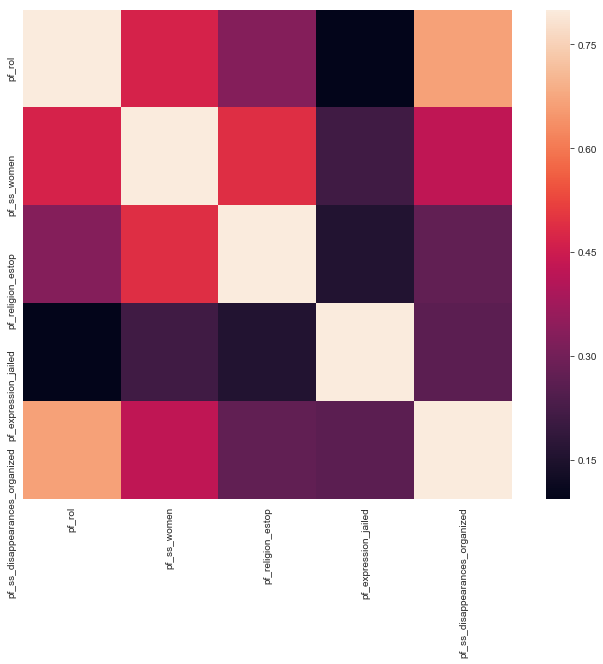

In [64]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [65]:
df_free.columns

Index(['pf_rol', 'pf_ss_women', 'pf_religion_estop', 'pf_expression_jailed',
       'pf_ss_disappearances_organized'],
      dtype='object')

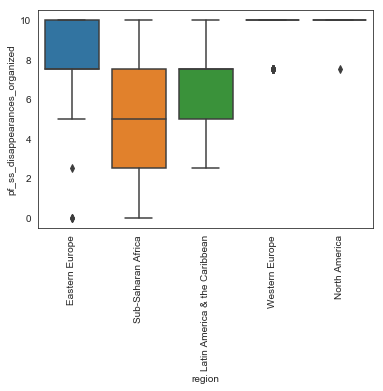

In [66]:
sns.boxplot(x=df_free2['region'], y = df_free2['pf_ss_disappearances_organized'])
plt.xticks(rotation=90)
plt.show()

In [67]:
# Descriptive statistics of violent conflicts.
print(df_free['pf_ss_disappearances_organized'].describe())

count    1029.000000
mean        6.827017
std         2.790659
min         0.000000
25%         5.000000
50%         7.500000
75%        10.000000
max        10.000000
Name: pf_ss_disappearances_organized, dtype: float64


**I am creating a heatmap to see what variables are highly correlated.  Variables that are highly correlated can be combined to create a feature**

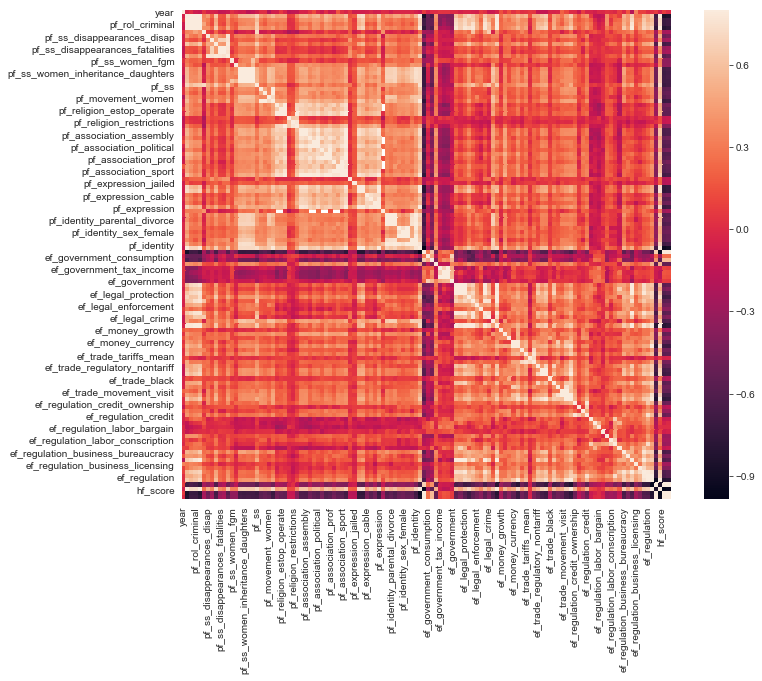

In [68]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [69]:
print(df.region.unique())

['Eastern Europe' 'Middle East & North Africa' 'Sub-Saharan Africa'
 'Latin America & the Caribbean' 'Caucasus & Central Asia' 'Oceania'
 'Western Europe' 'South Asia' 'North America' 'East Asia']


**I am creating a feature - Developed - to determine the difference between Developed regions and Developing regions **

In [70]:
features = pd.get_dummies(df['region']) 

features['Developed'] = np.where((df['region'].isin(['Eastern Europe', 'Western Europe', 'North America'])), 1, 0)
print(pd.crosstab(features['Developed'], df['region']))

region     Caucasus & Central Asia  East Asia  Eastern Europe  \
Developed                                                       
0                               54         54               0   
1                                0          0             198   

region     Latin America & the Caribbean  Middle East & North Africa  \
Developed                                                              
0                                    234                         171   
1                                      0                           0   

region     North America  Oceania  South Asia  Sub-Saharan Africa  \
Developed                                                           
0                      0       36         153                 378   
1                     18        0           0                   0   

region     Western Europe  
Developed                  
0                       0  
1                     162  


**I created a feature 'Terrorism'.  A score of 9 or below means a country experiences terrorism **

In [71]:
features['Terrorism'] = np.where(df['pf_ss_disappearances_fatalities']<=9, 1, 0)

print(df['pf_ss_disappearances'].groupby(features['Terrorism']).describe())

            count      mean       std       min       25%       50%  \
Terrorism                                                             
0          1265.0  9.155104  1.001769  4.457383  8.951595  9.500000   
1           113.0  4.965848  2.492057  0.000000  3.493891  5.490908   

                 75%        max  
Terrorism                        
0          10.000000  10.000000  
1           6.883714   8.814656  


**I created 2 features that break down "Rule of Law" into three groups - Low, Medium and High - represented by 'categorical_rule'. These categories are represented numerically with 1,2,3 defined as 'rule'.  This allows for a more nuanced interpretation of Rule of Law. **    

In [72]:
df['categorical_rule'] = np.where(df.pf_rol <=3, 'Low', (np.where((df.pf_rol >3) & (df.pf_rol <=7), 'Medium', 'High'))) 

In [73]:
df[['categorical_rule','pf_rol']].tail(15)

,categorical_rule,pf_rol
1443,Medium,4.247778
1444,Medium,5.200079
1445,Medium,5.200000
1446,Medium,4.800000
1447,Medium,4.100000
1448,Medium,4.700000
1449,Medium,6.500000
1450,High,7.700000
1451,Medium,6.800000
1452,Medium,6.400000


In [74]:
def rule_of_law(df):
    if df.pf_rol <=3:
        df['categorical_rule'] = 'Low'
        df['rule'] = 1
    elif (df.pf_rol >3) & (df.pf_rol <=7):
        df['categorical_rule'] = 'Medium'
        df['rule'] = 2
    else: df['categorical_rule'] = 'High'
    df['rule'] = 3

    return df

rule = df_free.apply(rule_of_law, axis=1)
rule.head()

,pf_rol,pf_ss_women,pf_religion_estop,pf_expression_jailed,pf_ss_disappearances_organized,categorical_rule,rule
0,5.291752,7.500000,10.0,10.0,10.0,Medium,3
1,3.819566,5.833333,5.0,10.0,5.0,Medium,3
2,3.451814,8.333333,10.0,10.0,7.5,Medium,3
3,5.744791,10.000000,7.5,10.0,7.5,Medium,3
6,8.171749,10.000000,10.0,10.0,10.0,High,3


**Missing women, women's security and women's movement seem to be highly correlated and therefore redundant.  I will scale them, then average them by subtracting the average of each variable from all values in that variable then divide by the standard deviation.  The new variable, women, is highly correlated with each of the variables.**  

In [75]:
means = df[['pf_ss_women_missing', 'pf_ss_women', 'pf_movement_women']].mean(axis=0)
stds = df[['pf_ss_women_missing', 'pf_ss_women', 'pf_movement_women']].std(axis=0)
features['women'] = ((df[['pf_ss_women_missing', 'pf_ss_women', 'pf_movement_women']] - means) / stds).mean(axis=1)

plotdf = df.loc[:, ['pf_ss_women_missing', 'pf_ss_women', 'pf_movement_women']]
plotdf['women'] = features['women'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                     pf_ss_women_missing  pf_ss_women  pf_movement_women  \
pf_ss_women_missing             1.000000     0.533166           0.343682   
pf_ss_women                     0.533166     1.000000           0.579494   
pf_movement_women               0.343682     0.579494           1.000000   
women                           0.774305     0.877299           0.791386   

                        women  
pf_ss_women_missing  0.774305  
pf_ss_women          0.877299  
pf_movement_women    0.791386  
women                1.000000  


**I will check to see if the variable, economic freedom is normally distributed.  
From my plot comparisons it looks like economic freedom is normally distributed.**  

In [76]:
from scipy import stats

print(stats.shapiro(df['ef_score'].dropna()))
stats.shapiro(np.log(df['ef_score'].dropna()))

(0.9729610085487366, 2.1264730377083688e-15)


(0.927161455154419, 2.502885554133582e-25)

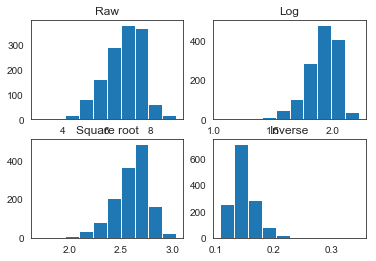

In [77]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['ef_score'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['ef_score'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['ef_score'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['ef_score'].dropna())
plt.title('Inverse')
plt.show()

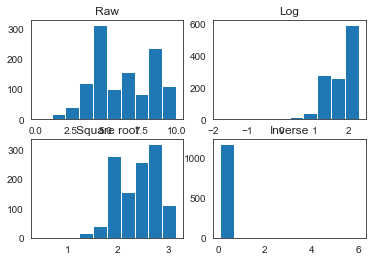

In [78]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['ef_legal_integrity'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['ef_legal_integrity'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['ef_legal_integrity'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['ef_legal_integrity'].dropna())
plt.title('Inverse')
plt.show()




**Raw appears to have a binomial distribution. The square root appears also is binomial but appears more more normal than the raw. I will make a feature from the square root.**

In [79]:
features['sqrt_econ_free'] = np.sqrt(df['ef_legal_integrity'])


**Reverse-coding the 'Harassment and physical hostilities based on religion' variable so that higher scores means more
 harassment (and thus possibly more violent conflict)**
 
 **It appears if there is a positive relationship between homicide and religious harassment.**

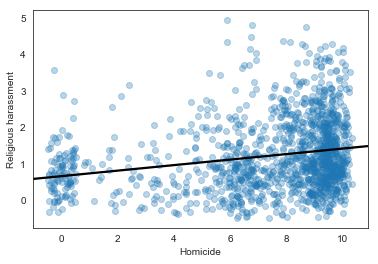

In [80]:

features['Religious_harassment'] = max(df['pf_religion_harassment']) - df['pf_religion_harassment']

sns.regplot(
    df['pf_ss_homicide'],
    features['Religious_harassment'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Homicide')
plt.ylabel('Religious harassment')
plt.show()

**Laws and regulations that influence media content and Political pressure and controls of media seem to be highly correlated and therefore redundant.  I will scale them, then average them by subtracting the average of each variable from all values in that variable then divide by the standard deviation.  The new variable, Press_freedom, is highly correlated with each of the variables.**  

In [81]:
means = df[['pf_expression_control','pf_expression_influence']].mean(axis=0)
stds = df[['pf_expression_control','pf_expression_influence']].std(axis=0)
features['press_restriction'] = ((df[['pf_expression_control','pf_expression_influence']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['pf_expression_control','pf_expression_influence']]
plotdf['press_restriction'] = features['press_restriction'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                         pf_expression_control  pf_expression_influence  \
pf_expression_control                 1.000000                 0.914703   
pf_expression_influence               0.914703                 1.000000   
press_restriction                     0.978443                 0.978443   

                         press_restriction  
pf_expression_control             0.978443  
pf_expression_influence           0.978443  
press_restriction                 1.000000  


**Perhaps violent conflict is exacerbated by a lack of procedural justice and a lack of free expression.  In order to analyze this relationship I created two features.  I coded Free Expression such that a score of 7 or above was equaivalent to a country with Freedom of Expression.  I coded Procedural Justices such that a score of 7 or above was equivalent to a country with procedural justice. I created another feature, Free by mulitiplying the two together. It appears that a country with procedural justice and greater freedom sees a decline in violent conflict. Countries without procedural justice there appears to be no impact levels of violent conflict.**



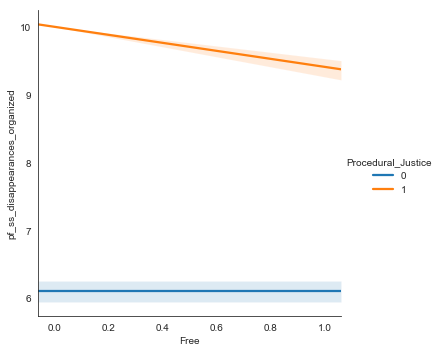

In [82]:
features['Free_Expression'] = np.where(df['pf_expression']>=7, 1, 0)
features['Procedural_Justice'] = np.where(df['pf_rol_procedural']>=7, 1,0)

# Create the interaction.
features['Free'] = features['Procedural_Justice'] * features['Free_Expression']

# A plot of an interaction.

features['pf_ss_disappearances_organized'] = df['pf_ss_disappearances_organized']
sns.lmplot(
    x='Free',
    y='pf_ss_disappearances_organized',
    hue='Procedural_Justice',
    data=features,
    scatter=False
)
plt.show()


In [87]:
df_new = df_free.loc[:, 'pf_ss_women':'pf_ss_disappearances_organized']
df_new['women'] = features['women'] 
df_new['Free'] = features['Free']
df_new['Terrorism'] = features['Terrorism']
df_new['sqrt_econ_free'] = features['sqrt_econ_free']
df_new['Religious_harassment'] = features['Religious_harassment']
df_new['press_restriction'] = features['press_restriction']
df_new['Free'] = features['Free']
df_new['Developed'] = features['Developed']
df_new['Free_Expression'] = features['Free_Expression']
df_new['Procedural_Justice'] = features['Procedural_Justice']


corrmat3 = df_new.corr()

print(corrmat3)




                                pf_ss_women  pf_religion_estop  \
pf_ss_women                        1.000000           0.490390   
pf_religion_estop                  0.490390           1.000000   
pf_expression_jailed               0.213228           0.159372   
pf_ss_disappearances_organized     0.426281           0.270303   
women                              0.878668           0.541784   
Free                               0.399904           0.365127   
Terrorism                         -0.283754          -0.102637   
sqrt_econ_free                     0.142194           0.069809   
Religious_harassment              -0.120725          -0.050335   
press_restriction                  0.563952           0.572338   
Developed                          0.536225           0.414321   
Free_Expression                    0.408043           0.498649   
Procedural_Justice                 0.399904           0.365127   

                                pf_expression_jailed  \
pf_ss_women        

**Looking at the correlation between the features and the target variable, organized conflict, none of the features have strong correlations.  The features that have the highest correlations are Free, Press Restriciton, Developed, Procedural Justice and Sqrt of Economic Freedom. The correlations range from .40 to .59 with press restriction with the strongest correlation.  Therefore out of all the features press restriction is most likely to explain organized conflict.**